# **Lista de Adyacencia**

#### **Usando Dictionary**
#### Lista de adyacencia como Dictionary

In [2]:
# Lista de adyacencia como un diccionario
ady_list = {} # Diccionario, para la Lista de Adyacencia
milista = []  # Lista, para los Vertices o Nodos


In [3]:
# Funcion para agregar Nodos nuevos a la lista (milista) 
def ad_nodo(nodo):
  if nodo not in milista:
    milista.append(nodo)
  else:
    print("Nodo ", nodo, "ya esta en mi lista")


In [4]:
# Funcion para Crear la Lista de Adyacencia, a partir de las aristas formadas
# nodo1: key, nodo2: Value
def ad_arista(nodo1, nodo2):
  temp = []
  if nodo1 in milista and nodo2 in milista: #Si los nodos ya fueron agregados previamente a "milista"
    if nodo1 not in ady_list: #Si nodo1 no está en la Lista de Adyacencia
      temp.append(nodo2)      #Se agrega el nodo2 a la lista "temp"
      ady_list[nodo1] = temp  #Se agrega elemento al dictionary key=nodo1, value=temp
   
    elif nodo1 in ady_list:   #Si nodo1 si está en la Lista de Adyacencia
      temp.extend(ady_list[nodo1])  #Agrega elementos de una Lista (ady_list[nodo1]) al final de la actual lista (temp)
      temp.append(nodo2)
      ady_list[nodo1] = temp
       
  else: #Si algunos de los Nodos(vertices) no fueron agregados previamente a "milista" (Lista de Nodos)
    print("Nodo no existe!")


In [5]:
def grafo():
  for nodo in ady_list:
    print(nodo, "-->", [i for i in ady_list[nodo]])

In [6]:
#adicionamos nodos

ad_nodo(0)
ad_nodo(1)
ad_nodo(2)
ad_nodo(3)
ad_nodo(4)


In [7]:
# adicionamos aristas

ad_arista(0,1)
ad_arista(1,2)
ad_arista(2,3)
ad_arista(3,0)
ad_arista(3,4)
ad_arista(4,0)

In [8]:
grafo()

0 --> [1]
1 --> [2]
2 --> [3]
3 --> [0, 4]
4 --> [0]


In [12]:
print(ady_list)

{0: [1], 1: [2], 2: [3], 3: [0, 4], 4: [0]}


**Otra forma**
Lista de adyacencia como listas

**Opcion #1:**

In [15]:
import graphviz as gv

In [16]:
# Creamos la Clase Graph
class Graph:
  def __init__(self):
    self.Vertices = []
    self.label2v = dict()
    self.G = []

  def node(self, label):
    self.label2v[label] = len(self.Vertices)
    self.Vertices.append(label)
    self.G.append([])

  def nodes(self, labels):
    for label in labels:
      self.node(label)

  def edge(self, u, v):
    u = self.label2v[u]
    v = self.label2v[v]

    self.G[u].append(v)

  def edges(self, u, vs):
    for v in vs:
      self.edge(u, v)

  def Dot(self):
    graph = gv.Digraph("X")
    n = len(self.G)
    for u in range(n):
      graph.node(str(u), str(self.Vertices[u]))

    for u in range(n):
      for v in self.G[u]:
        graph.edge(str(u), str(v))

    return graph

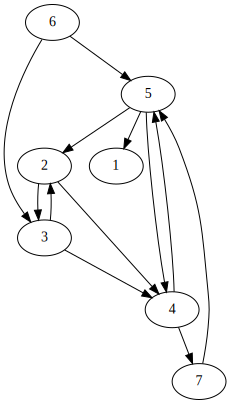

In [17]:
G = Graph()
G.nodes(["1", "2", "3", "4", "5", "6", "7"])
G.edges("2", ["3", "4"])
G.edges("3", ["2", "4"])
G.edges("4", ["5", "7"])
G.edges("5", ["1", "2", "4"])
G.edges("6", ["3", "5"])
G.edges("7", ["5"])

G.Dot()

**Opcion #2:**

In [18]:
# Son 7 vertices y la lista de adyacencia G el primer elemento representa al nodo 1 (las aristas van desde el nodo 2)
Vertices = ["1", "2", "3", "4", "5", "6", "7"]
G = [[],
     [2, 3],
     [1, 3],
     [4, 6],
     [0, 1, 3],
     [2, 4],
     [4]]

digraph nombre {
	0 [label=1]
	1 [label=2]
	2 [label=3]
	3 [label=4]
	4 [label=5]
	5 [label=6]
	6 [label=7]
	1 -> 2
	1 -> 3
	2 -> 1
	2 -> 3
	3 -> 4
	3 -> 6
	4 -> 0
	4 -> 1
	4 -> 3
	5 -> 2
	5 -> 4
	6 -> 4
}



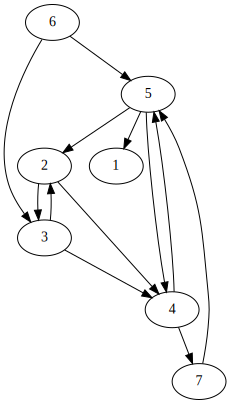

In [20]:
graph = gv.Digraph("nombre")

n = len(G)
for u in range(n):
  graph.node(str(u), Vertices[u])

for u in range(n):
  for v in G[u]:
    graph.edge(str(u), str(v))

#Nodo "i" tiene equiqueta "i+1"
print(graph)
graph